In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
df=pd.read_csv('zomato.csv')

In [146]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [147]:
df.shape

(51717, 17)

In [148]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [187]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet


In [188]:
df.shape

(50279, 10)

In [189]:
df.drop_duplicates(inplace=True)

In [190]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [191]:

def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [192]:
df.rate.isnull().sum()

0

In [193]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()


0

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31066 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31066 non-null  object 
 1   online_order  31066 non-null  object 
 2   book_table    31066 non-null  object 
 3   rate          31066 non-null  float64
 4   votes         31066 non-null  int64  
 5   location      31066 non-null  object 
 6   rest_type     31066 non-null  object 
 7   cuisines      31066 non-null  object 
 8   Cost2         31066 non-null  float64
 9   Type          31066 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.6+ MB


In [195]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31066 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31066 non-null  object 
 1   online_order  31066 non-null  object 
 2   book_table    31066 non-null  object 
 3   rate          31066 non-null  float64
 4   votes         31066 non-null  int64  
 5   location      31066 non-null  object 
 6   rest_type     31066 non-null  object 
 7   cuisines      31066 non-null  object 
 8   Cost2         31066 non-null  float64
 9   Type          31066 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.6+ MB


In [197]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet


In [198]:
df.rename(columns = {'approx_cost(for two people)' : 'Cost2' , 'listed_in(type)' : 'Type'}, inplace = True )
df.head(20)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,other,Casual Dining,other,800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,others,other,600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,other,700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,other,550.0,Cafes


In [199]:
df['location'].unique() 

array(['Banashankari', 'Basavanagudi', 'other', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'HSR',
       'Marathahalli', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'St. Marks Road',
       'Cunningham Road', 'Commercial Street', 'Domlur', 'Ejipura',
       'Kammanahalli', 'Koramangala 6th Block', 'Brookefield',
       'Rajajinagar', 'Banaswadi', 'Kalyan Nagar', 'New BEL Road',
       'Malleshwaram'], dtype=object)

In [200]:
df = df.drop(['listed_in(city)'], axis = 1)

KeyError: "['listed_in(city)'] not found in axis"

In [201]:
df['Cost2'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [202]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',' , '')
        return float(value)
    else:
        return float(value)
df['Cost2'] = df['Cost2'].apply(handlecomma)
df['Cost2'].unique()                     
                     

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [203]:
df['Cost2'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost2, dtype: float64

In [204]:
df.head(20)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,other,Casual Dining,other,800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,others,other,600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,other,700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,other,550.0,Cafes


In [205]:
df['rest_type'].value_counts()

rest_type
Quick Bites           10685
Casual Dining          6916
others                 5926
Cafe                   2319
Dessert Parlor         1321
Delivery               1270
Takeaway, Delivery     1056
Casual Dining, Bar      916
Bakery                  657
Name: count, dtype: int64

In [206]:
rest_types=df['rest_type'].value_counts(ascending = False)
rest_types

rest_type
Quick Bites           10685
Casual Dining          6916
others                 5926
Cafe                   2319
Dessert Parlor         1321
Delivery               1270
Takeaway, Delivery     1056
Casual Dining, Bar      916
Bakery                  657
Name: count, dtype: int64

In [207]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Casual Dining, Bar    916
Bakery                657
Name: count, dtype: int64

In [208]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
df['rest_type'] = df['rest_type'].apply(handle_rest_type) 
df['rest_type'].value_counts()
    

rest_type
Quick Bites           10685
others                 7499
Casual Dining          6916
Cafe                   2319
Dessert Parlor         1321
Delivery               1270
Takeaway, Delivery     1056
Name: count, dtype: int64

In [209]:
df.head(20)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,other,Casual Dining,other,800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,others,other,600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,other,700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,other,550.0,Cafes


In [210]:
df['location'].value_counts().tail()

location
St. Marks Road       226
Shanti Nagar         212
Commercial Street    139
Shivajinagar         132
Ejipura              122
Name: count, dtype: int64

In [211]:
location = df['location'].value_counts(ascending = False)
location_lessthan300 = location[location <300]
location_lessthan300

location
Domlur               274
Cunningham Road      250
St. Marks Road       226
Shanti Nagar         212
Commercial Street    139
Shivajinagar         132
Ejipura              122
Name: count, dtype: int64

In [212]:
def handle_location(value):
    if(value in location_lessthan300):
        return 'other'
    else:
        return value
df['location']= df['location'].apply(handle_location)
df['location'].value_counts()

location
other                    4617
BTM                      2005
Whitefield               1776
Indiranagar              1628
HSR                      1581
Marathahalli             1509
Koramangala 5th Block    1402
JP Nagar                 1303
Electronic City          1197
Jayanagar                1065
Bannerghatta Road        1007
Bellandur                 961
Sarjapur Road             863
Brigade Road              603
New BEL Road              579
Banashankari              553
Kalyan Nagar              546
Malleshwaram              540
Brookefield               526
MG Road                   506
Koramangala 4th Block     505
Koramangala 7th Block     494
Koramangala 6th Block     494
Ulsoor                    483
Rajajinagar               453
Koramangala 1st Block     434
Church Street             427
Basavanagudi              423
Frazer Town               418
Kammanahalli              386
Banaswadi                 384
Residency Road            377
Lavelle Road              373
O

# Cleaning Cuisines

In [213]:
cuisines=df['cuisines'].value_counts(ascending = True)
cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines(value):
    if value in cuisines_lessthan100:
        return 'other'
    
    else:
        return value
    
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()
    

cuisines
other                                               18487
North Indian                                         1665
North Indian, Chinese                                1367
South Indian                                         1029
Bakery, Desserts                                      535
Biryani                                               497
Fast Food                                             416
South Indian, North Indian, Chinese                   414
Cafe                                                  377
Desserts                                              371
Bakery                                                339
Chinese                                               302
Ice Cream, Desserts                                   271
Mithai, Street Food                                   234
Chinese, North Indian                                 217
North Indian, Chinese, Biryani                        206
Desserts, Ice Cream                                   205
North

In [214]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,other,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,other,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,other,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,other,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,other,Casual Dining,other,800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,others,other,600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,other,700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,other,550.0,Cafes


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31066 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31066 non-null  object 
 1   online_order  31066 non-null  object 
 2   book_table    31066 non-null  object 
 3   rate          31066 non-null  float64
 4   votes         31066 non-null  int64  
 5   location      31066 non-null  object 
 6   rest_type     31066 non-null  object 
 7   cuisines      31066 non-null  object 
 8   Cost2         31066 non-null  float64
 9   Type          31066 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.6+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'other'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Koramangala 5th Block'),
  Text(11, 0, 'Richmond Road'),
  Text(12, 0, 'Koramangala 7th Block'),
  Text(13, 0, 'Koramangala 4th Block'),
  Text(14, 0, 'Bellandur'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Lavelle Road'),
  Text(24, 0, 'Church Street'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Residency Road'),
  Te

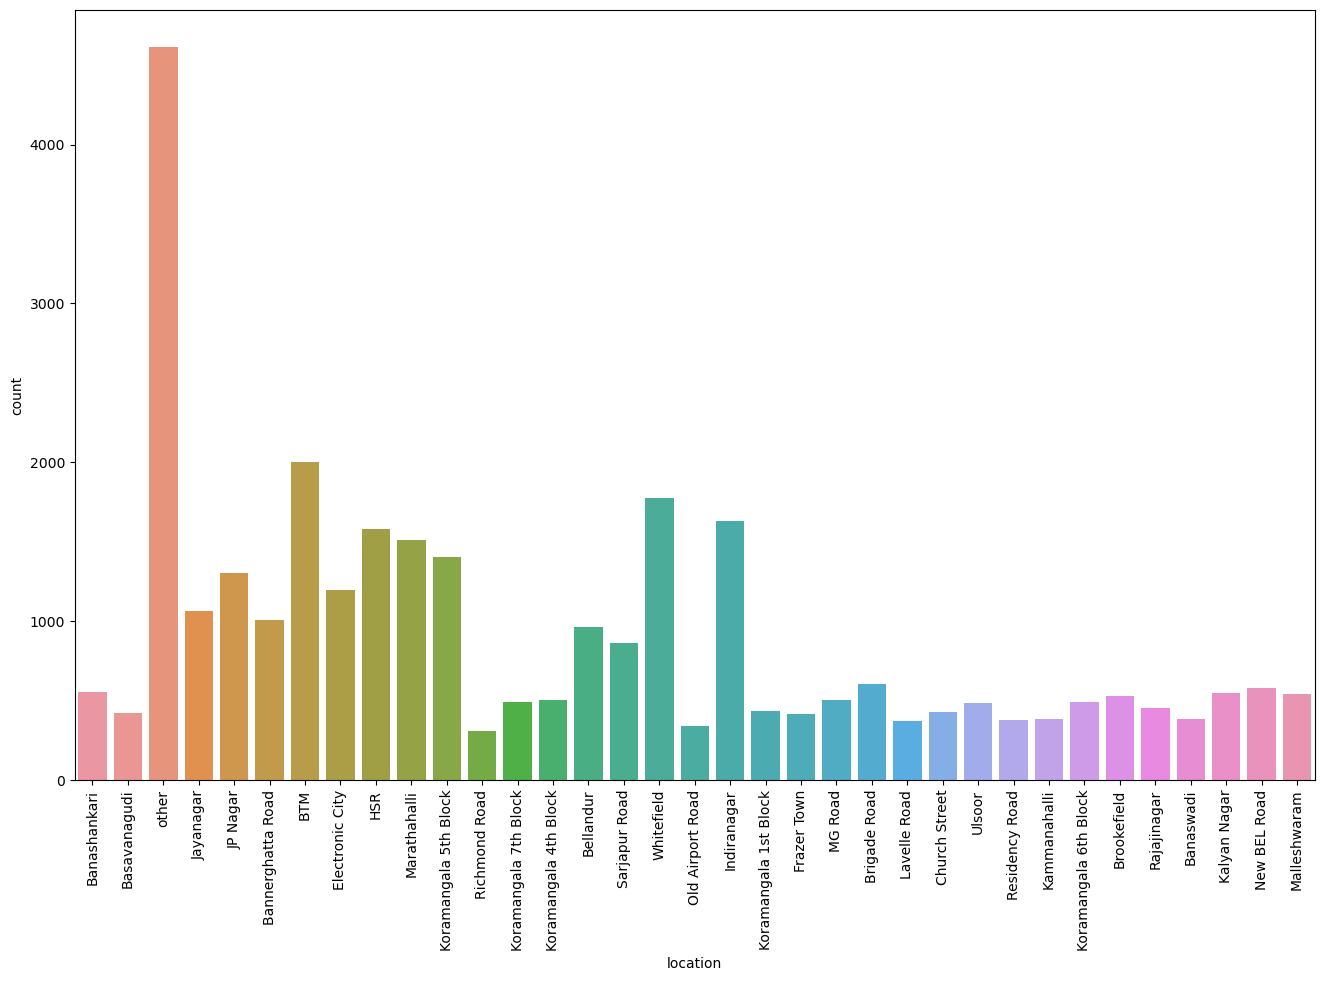

In [228]:
plt.figure(figsize = (16,10))
sns.countplot(x='location', data=df)
plt.xticks(rotation=90)

<Axes: xlabel='online_order', ylabel='count'>

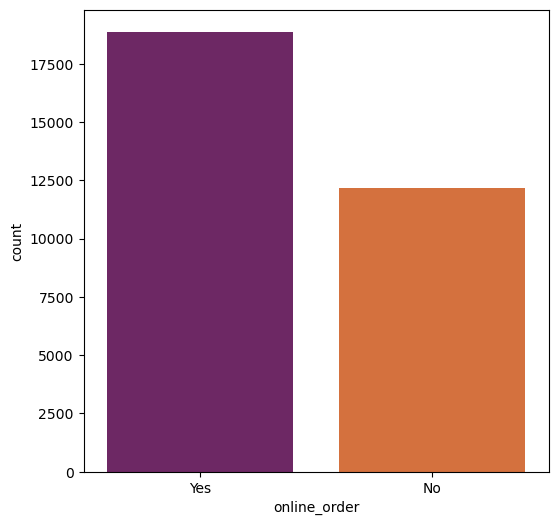

In [226]:
plt.figure(figsize = (6,6))
sns.countplot(x='online_order', data = df, palette = 'inferno')

# Visualizing Book Table Facilty

<Axes: xlabel='book_table', ylabel='count'>

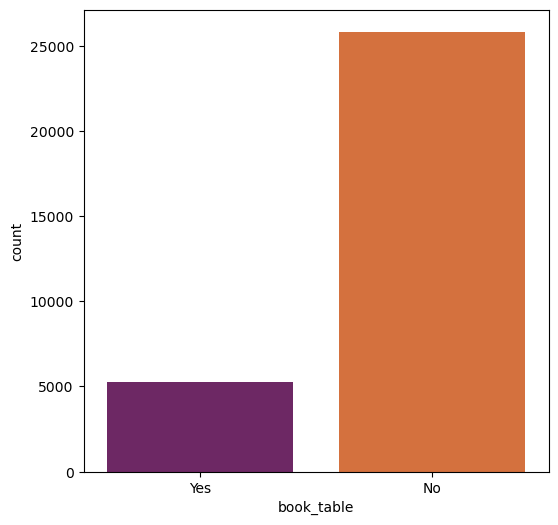

In [230]:
plt.figure(figsize = (6,6))
sns.countplot(x='book_table', data = df, palette = 'inferno')

<Axes: xlabel='online_order', ylabel='rate'>

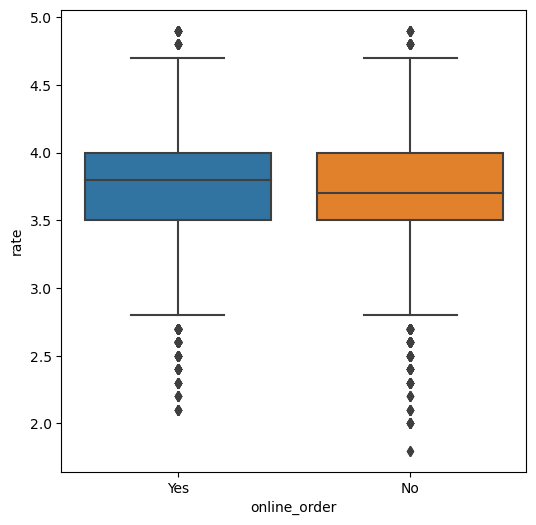

In [232]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data = df)

<Axes: xlabel='book_table', ylabel='rate'>

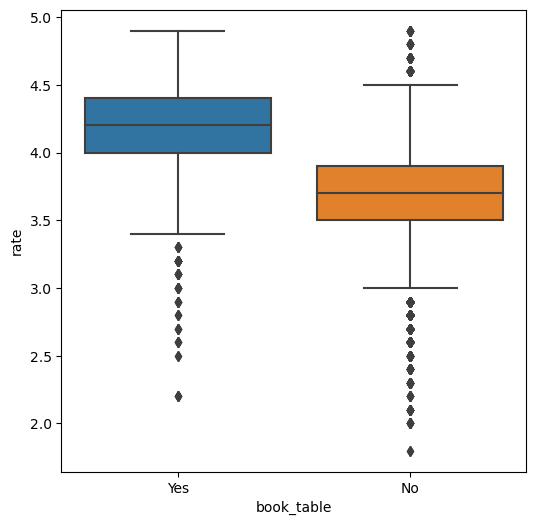

In [233]:
plt.figure(figsize = (6,6))
sns.boxplot(x='book_table', y='rate', data = df)

In [237]:
df1 = df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     606  1399
Banashankari            248   305
Banaswadi               174   210
Bannerghatta Road       375   632
Basavanagudi            161   262
Bellandur               347   614
Brigade Road            255   348
Brookefield             165   361
Church Street           169   258
Electronic City         644   553
Frazer Town             183   235
HSR                     403  1178
Indiranagar             587  1041
JP Nagar                506   797
Jayanagar               320   745
Kalyan Nagar            217   329
Kammanahalli            155   231
Koramangala 1st Block   118   316
Koramangala 4th Block   241   264
Koramangala 5th Block   505   897
Koramangala 6th Block   167   327
Koramangala 7th Block   136   358
Lavelle Road            224   149
MG Road                 251   255
Malleshwaram            210   330
Marathahalli            566   943
New BEL Road            250   329
Old Airport Road        169   173
Rajajinagar             208   245
Residency Road          248   129
Richmond Road           194   112
Sarjapur Road           258   605
Ulsoor                  170   313
Whitefield              786   990
other                  1968  2649